In [2]:
import os, sys
sys.path.append('..')
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import lines as mlines
from pathlib import Path

from modules.evalutils import get_dir_nums, get_tbls, param_diffs
from modules.evalutils import conj_plot_data

In [3]:
nums = get_dir_nums(log_dir='../dbin')

In [6]:
ret = get_tbls('basicexp', nums, log_dir='../dbin')

d_metrics, d_resid, d_params = ret

In [7]:
cmp_param = '_condition_name'

In [8]:
exps_all = d_params[d_params['_expdesign_name'] == 'rm_norm'].index

In [9]:
exp_params = d_params.T[exps_all]
param_diffs(exp_params)

_train_seed        3
model_fn           6
_condition_name    2
_rm_norm           2
dtype: int64

In [10]:
tmp  = d_metrics.join(d_params[[cmp_param]], on='exp_name')

exp_metrics = tmp[tmp['exp_name'].isin(exps_all)]

In [11]:
exp_metrics['exp_name'].unique()

array(['basicexp-54', 'basicexp-55', 'basicexp-56', 'basicexp-57',
       'basicexp-58', 'basicexp-59'], dtype=object)

In [12]:
d_params.loc[exps_all, '_test_path'].unique()

array(['../../../other-chess-data/regulation-test-2-easy'], dtype=object)

In [13]:
df_agg, color_ind = conj_plot_data(exp_metrics, cmp_param)

In [14]:
def foo(x): 
    if pd.isna(x):return 'blue'
    else: return x

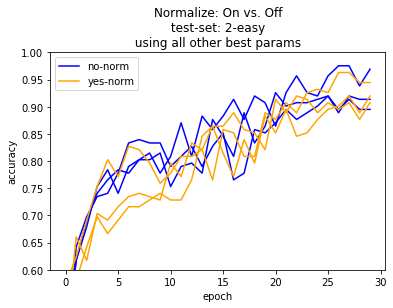

In [15]:
for i in range(df_agg.shape[0]):
    plt.plot(df_agg.T.iloc[:-1,i], 
             c=foo(df_agg.T.loc['color'][i]))
    
plt.title('Normalize: On vs. Off\n test-set: 2-easy \n using all other best params ')
plt.ylabel('accuracy')
plt.xlabel('epoch')

handles = [mlines.Line2D([],[],c=foo(color)) 
           for color in color_ind.values ]
plt.legend(handles, [str(e) for e in color_ind.index])

axes = plt.gca()
axes.set_ylim([.6, 1.0]);

In [20]:
df_agg, color_ind = conj_plot_data(exp_metrics, cmp_param
                            ,values='test_loss')

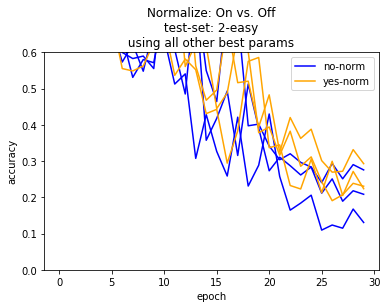

In [21]:
for i in range(df_agg.shape[0]):
    plt.plot(df_agg.T.iloc[:-1,i], 
             c=foo(df_agg.T.loc['color'][i]))
    
plt.title('Normalize: On vs. Off\n test-set: 2-easy \n using all other best params ')
plt.ylabel('accuracy')
plt.xlabel('epoch')

handles = [mlines.Line2D([],[],c=foo(color)) 
           for color in color_ind.values ]
plt.legend(handles, [str(e) for e in color_ind.index])

axes = plt.gca()
axes.set_ylim([0.0, 0.6]);